---
##  Optional: Dimensionality Reduction
While having as many features as possible usually helps when solving classification problems, the high dimensionalyty makes it hard to vizualize the data and can (depending on the model) drastically increase runtime. Sklearn offers several methos of reducing dimensionallity. You do not need to understand these methods for this course, but knowing them can help you in future machine learning or data analysis tasks.

### PCA
Principal Component analysis is a method for remapping data to a space with less dimensions, while still keeping as much variance of the data as possible. Consider the dataset below, that can be used to classify three different types of wine based on 13 features. A machine learning classifier does not care that one of these features is the alkohol content for instance. Remapping all these 13 dimensions (that are meaningful to humans) to two implicit dimensions (that are not meaningful to humans anymore) by PCA, can drastically decrease the size of the data.

Further reading: https://www.datacamp.com/tutorial/principal-component-analysis-in-python

In [ ]:
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.datasets import load_wine

wine = load_wine(as_frame = True)
df = wine.data
df["target"] = wine.target.apply(lambda x: wine.target_names[x])
sns.pairplot(df, hue = "target")

We kept 99.98271461166031% of the variance of the original 13 dimensions


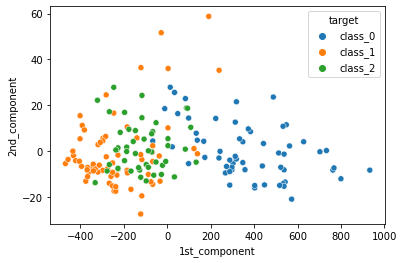

In [26]:
wine = load_wine()
pca = PCA(n_components=2)
pca.fit(wine.data)
df['1st_component'], df['2nd_component'] = pca.transform(wine.data).T
sns.scatterplot(x='1st_component', y='2nd_component', hue='target', data=df)
print("We kept {}% of the variance of the original 13 dimensions".format(sum(pca.explained_variance_ratio_)*100))

This cell checks the performance of an arbitrary classifier (in this case SVC), that was trained with a dataset, that uses all 13 features.

In [27]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

digits = load_wine()

X = digits.data
y = digits.target

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0);
clf = SVC()
print('"size" of data:', Xtrain.size)

clf.fit(Xtrain, ytrain)
y_model = clf.predict(Xtest)
print("achieved accuracy:", accuracy_score(ytest, y_model))

"size" of data: 1729
achieved accuracy: 0.8222222222222222


This cell checks the performance of an arbitrary classifier, that was trained with a dataset, that uses the two first principal components (implicit dimensions) as features.

In [28]:
pca = PCA(n_components=2)
pca.fit(Xtrain)

Xtrain_transformed = pca.transform(Xtrain)
clf = SVC()

print('"size" of data:', Xtrain_transformed.size)

clf.fit(Xtrain_transformed, ytrain)
y_model = clf.predict(pca.transform(Xtest))

print("achieved accuracy:", accuracy_score(ytest, y_model))

"size" of data: 266
achieved accuracy: 0.7777777777777778


This cell checks the performance of an arbitrary classifier, that was trained with a dataset, that uses two subjectively "promising looking" dimensions (i.e. protein content and proline amino acid) as features.

In [29]:
digits = load_wine()

X_small = digits.data[:,-3:-1]
y = digits.target

Xtrain_small, Xtest_small, ytrain_b, ytest_b = train_test_split(X_small, y, random_state=0);
clf = SVC()

print('"size" of data:', Xtrain_small.size)

clf.fit(Xtrain_small, ytrain_b)
y_model = clf.predict(Xtest_small)

print("achieved accuracy:", accuracy_score(ytest_b, y_model))

"size" of data: 266
achieved accuracy: 0.6222222222222222


---
## Optional: Feature engineering
If you are interested in sklearn methods for tidying data, have a look at the linked tutorial. It also contains some of the content that we covered in the pandas lectures.

https://github.com/jakevdp/PythonDataScienceHandbook/blob/599aa0fe3f882c0001670e676e5a8d43b92c35fc/notebooks/05.04-Feature-Engineering.ipynb